# 1) Import Libraries

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2) Import Data
* By using read csv function of pandas we have taken Invistico_Airline file

In [2]:
df = pd.read_csv("Invistico_Airline.csv") 

# 3) Make a copy of data
* After import data file we have to copy that file.
* By using copy function , we copy that file into df for our data as remain as same(Primary Task)


In [3]:
df = df.copy()

* Here we use df.head method.* This method is used to display the first few rows of DataFramea

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# 4) To check the Information of Data
* df.info method provides the concise(descriptive) summary of the DataFrame.
* n that includes the data types, non-null value and memory usage.
* Output:- From that method, we can see that the number of columns present in dataframe, type of data, memory usage information.
* We see the null values in Arrival Delay in Minutes.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

# Use of Describe Function
* This function is used to check the information about the descriptive statistic of numerical column.
* by using this function we can assume that the data is normally distributed or not.
* Output:- Summary statisics for each numerical column including count, mean,standard deviation, minimum, maximum and various quantile.
* This is Valuable for Distribuion of data.

In [6]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# 5) Process of Data Normalization (EDA)
* Here we use value counts.
* By using value counts , we found unique value in a single column.
* Output:- Counts of unique value eg:1) Number of Satisfied Passenger 2) Number of Dissatisfied Passenger.
* This information helps in understanding the distribution of values within the column.

In [7]:
df["satisfaction"].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [8]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [9]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

* Here we check the value count of Type of Travel column.
* In that column check the relation betweeen 2 columns.
* Output : Count of unique value:1) Business Travel 2) Personal Travel.

In [10]:
df["Type of Travel"].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [11]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* Here we use counplot function
* countplot use for to check the relation between gender and satisfacion column.
* It can help the quickly understanding the distribution of data.
* Output:- 1) Blue colour shows the number of female who are satisfied and orange is dissatisfied.
* Female: 1) More than 40000 female are disatisfied and above 20000 female are dissatisfied.
* 2) more than 25000 male are satisfied and more than 30000 male are dissatisfied.

<Axes: xlabel='Gender', ylabel='count'>

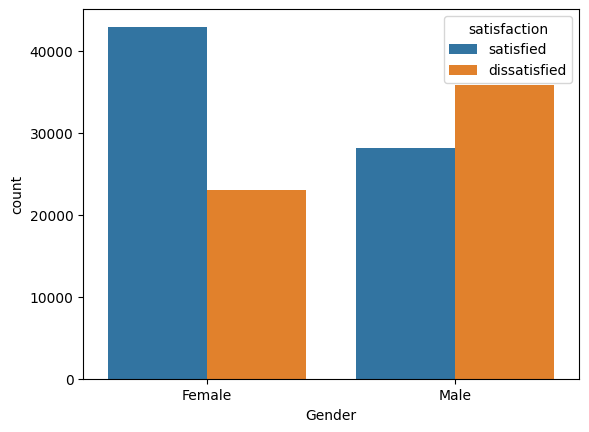

In [12]:
sns.countplot(x=df["Gender"], hue=df["satisfaction"])

* Here we check the correlation between two columns.
* it is useful for understanding how the distribute one categorical variable into another variable.
* Output: Difference in between male and female on basis of satisfaction level.

In [13]:
pd.crosstab(index=df["satisfaction"],columns=df["Gender"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


# Use of Countplot
* countplot is used to check the relation between customer type and satisfacion column.
* Output: The graph shows that the satisfied loyal and disloyal customer.


<Axes: xlabel='Customer Type', ylabel='count'>

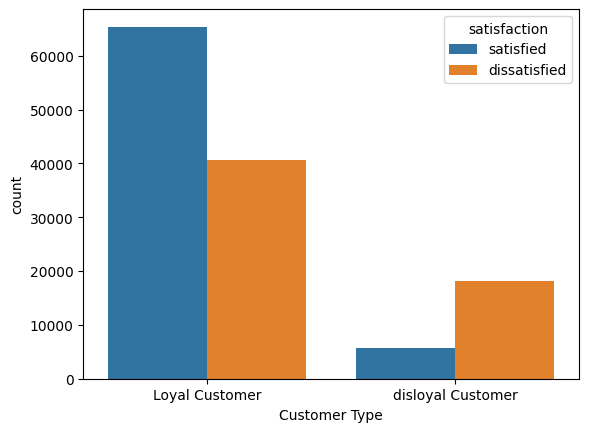

In [14]:
sns.countplot(x=df["Customer Type"], hue=df["satisfaction"])

* To check the relation between customer type and gender.
* The graph shows the Loyal and Disloyal Customer on basis of gender.


<Axes: xlabel='Customer Type', ylabel='count'>

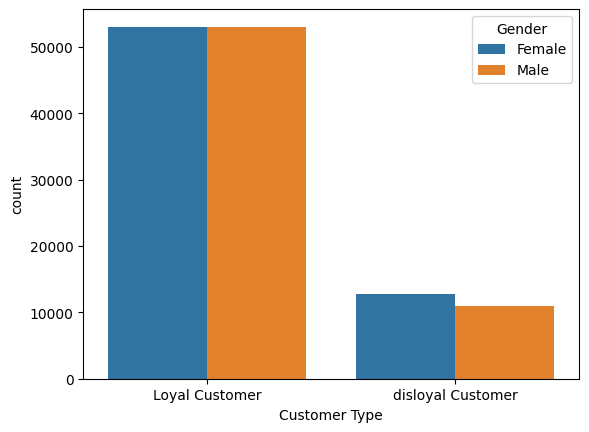

In [15]:
sns.countplot(x=df["Customer Type"], hue=df["Gender"])

* Here we check the Correlation between customer type and gender.
* Output:- Loyal and Disloyal Customer on the basis of Gender.

In [16]:
pd.crosstab(index=df["Customer Type"],columns=df["Gender"]) 

Gender,Female,Male
Customer Type,,
Loyal Customer,53056,53044
disloyal Customer,12843,10937


* Here we to check the relation between Type of travel and satisfaction.
* The graph shows the Personal travel and Business Travel.

<Axes: xlabel='Type of Travel', ylabel='count'>

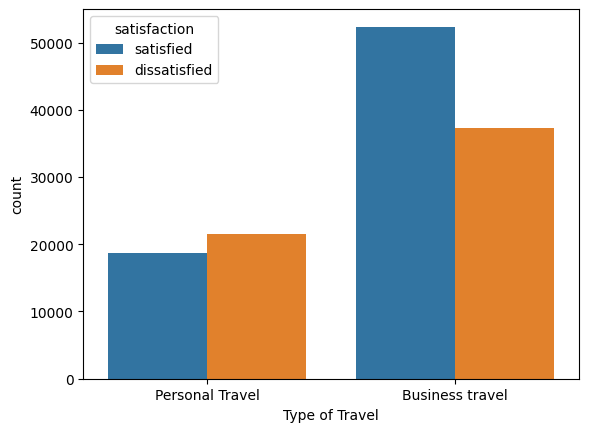

In [17]:
sns.countplot(x=df["Type of Travel"], hue=df["satisfaction"])

* Here we check the relation between Type of Travel and Gender.
* The graph shows the Personal Travel and Business Travel Relation with Gender.

<Axes: xlabel='Type of Travel', ylabel='count'>

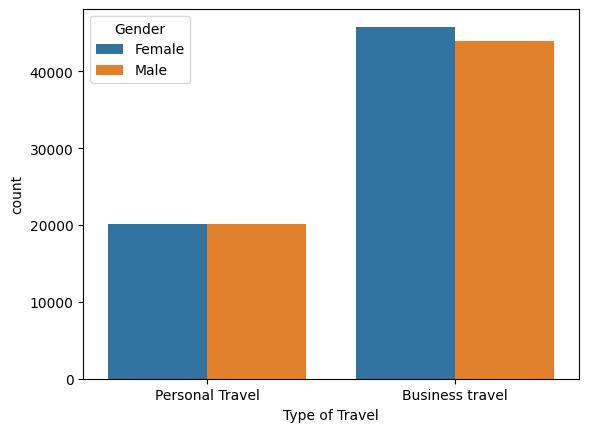

In [18]:
sns.countplot(x=df["Type of Travel"], hue=df["Gender"])

* This plot shows that the relation between "type of travels" and "Class".
* Different colors within the bars represent the different "Class" categories (Economy, Business, First), allowing you to see how "Class" is distributed within each "Type of Travel" category.
* The graph distributed in Personal Travel and Business Travel.

<Axes: xlabel='Type of Travel', ylabel='count'>

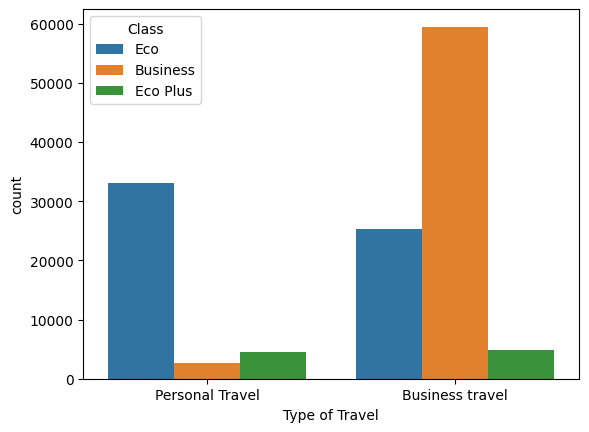

In [19]:
sns.countplot(x=df["Type of Travel"], hue=df["Class"])

* This graph shows that the relation between "Type of Travel" and "Customer Type".
* Loyal and Disloyal Customer choose a Personal and Business Travel.
* Loyal customer choose Business travel as compare to perosal travel and disloyal customer choose only business travel.

<Axes: xlabel='Type of Travel', ylabel='count'>

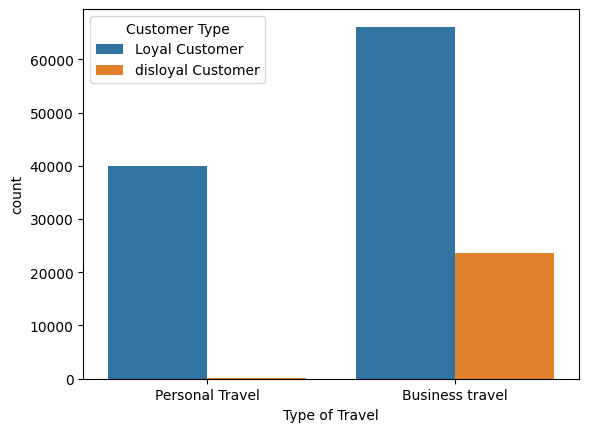

In [20]:
sns.countplot(x=df["Type of Travel"], hue=df["Customer Type"])

* The graph shows the relation between "Class" and "Satisfaction".
* There are 3 categories of customer(Eco, Business Class, Eco Plus) on the basis of satisfaction level.
* The category "Eco" shows the less customer satiesfied and large number of customer are dissatisfied.
* "Eco Plus" category shows less number of satisfaction and dissatisfaction level as compare to Eco and Business category. 

<Axes: xlabel='Class', ylabel='count'>

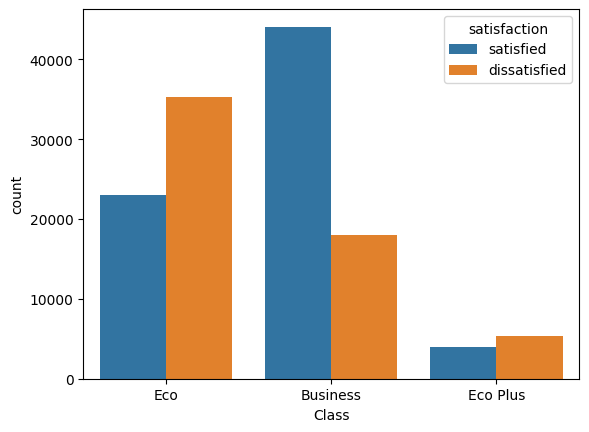

In [21]:
sns.countplot(x=df["Class"], hue=df["satisfaction"])

# Numerical Analysis

* A histogram provides a visual representation of the distribution of a single numerical value.
* It shows how ages distributed within the dataset.

<Axes: xlabel='Age', ylabel='Count'>

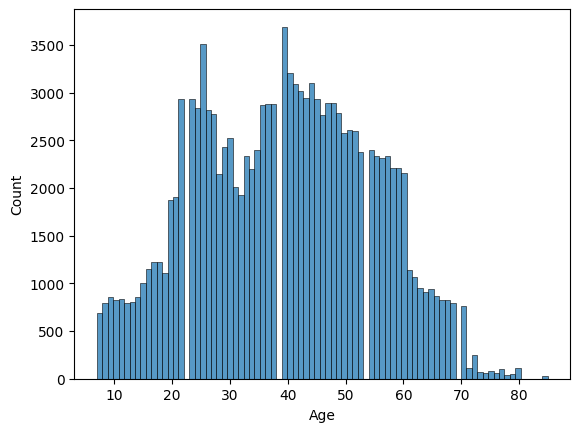

In [22]:
sns.histplot(df, x="Age")

* Plot box is used to check the null value present or not in data.

<Axes: >

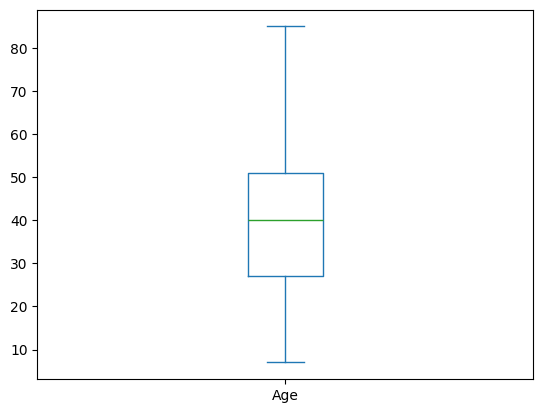

In [23]:
df["Age"].plot.box()

In [24]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


* The graph shows the distribution of data.

<Axes: xlabel='Flight Distance', ylabel='Count'>

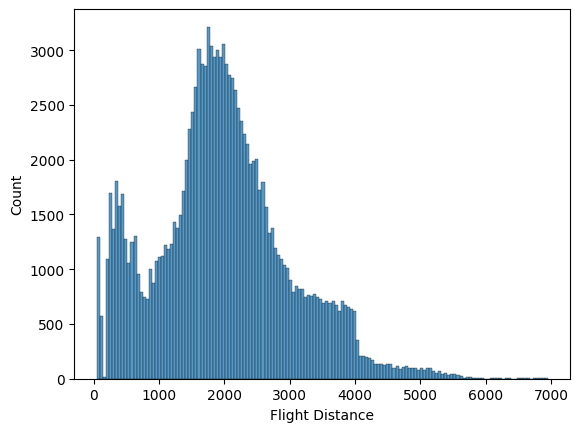

In [25]:
sns.histplot(df,x="Flight Distance")

# Check Outliers
* Here we check the outliers of Flight Distance Column.
* we have to remove that outliers.

<Axes: >

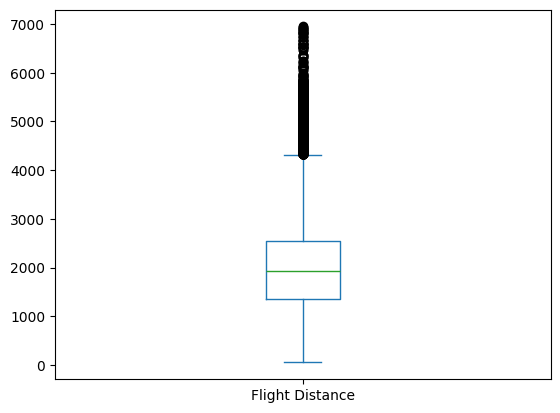

In [26]:
df["Flight Distance"].plot.box()

* The code aims to visualize the distribution of "Flight Distance" , in that high values consider as outliers.
* we take 0.977(97.7) percentile of data shows box plot which shows the clear view of data.

<Axes: >

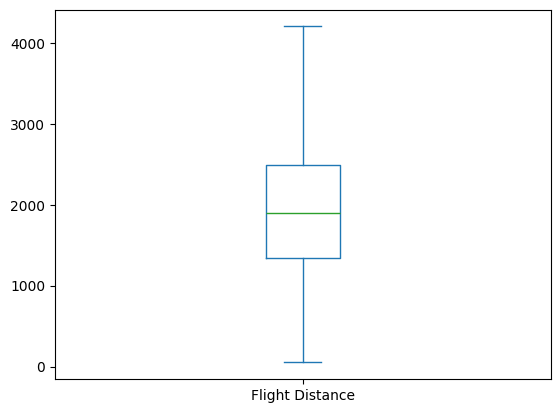

In [27]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].plot.box()

* Check the shape of dataframe.

In [28]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].shape

(126896,)

In [29]:
df.shape

(129880, 23)

* Save the DataFrame 

In [89]:
df= df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

<Axes: >

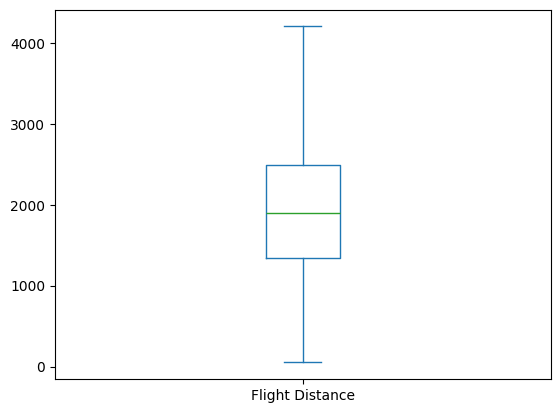

In [32]:
df["Flight Distance"].plot.box()

In [33]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,126896.000000,126896.000000,126896.000000,126896.00000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126520.000000
mean,39.668981,1914.669737,2.840413,2.99074,2.849152,2.989606,3.242301,3.378822,3.518298,3.470787,3.470086,3.490402,3.695680,3.341997,3.708100,3.347190,14.146427,14.527924
std,15.126998,938.325817,1.394102,1.52885,1.443408,1.303912,1.319753,1.348232,1.308372,1.307125,1.269992,1.291948,1.156963,1.260086,1.151048,1.299965,36.217608,36.671598
min,7.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1337.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1901.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2489.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4204.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* Here we use plot.box function to check the outliers.
* In our DataFrame("Departure Delay in Minues") there are too many ouliers are seen that's why remove that outliers.

<Axes: >

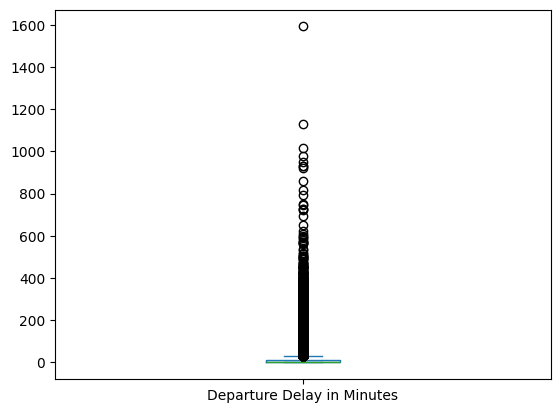

In [34]:
df["Departure Delay in Minutes"].plot.box()

In [35]:
df["Departure Delay in Minutes"].quantile(0.9)

42.0

* Here we change the name of column.

In [36]:
df["Dept_Delay"]= df["Departure Delay in Minutes"]
df["Arr_Delay"]= df["Departure Delay in Minutes"]

* Drop that old column name after adding new name of column.

In [37]:
df.drop(["Departure Delay in Minutes","Arrival Delay in Minutes"],axis=1, inplace=True)

* Check the information of DataFrame by removing all outliers and null values.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       126896 non-null  object
 1   Gender                             126896 non-null  object
 2   Customer Type                      126896 non-null  object
 3   Age                                126896 non-null  int64 
 4   Type of Travel                     126896 non-null  object
 5   Class                              126896 non-null  object
 6   Flight Distance                    126896 non-null  int64 
 7   Seat comfort                       126896 non-null  int64 
 8   Departure/Arrival time convenient  126896 non-null  int64 
 9   Food and drink                     126896 non-null  int64 
 10  Gate location                      126896 non-null  int64 
 11  Inflight wifi service              126896 non-null  int64

<Axes: >

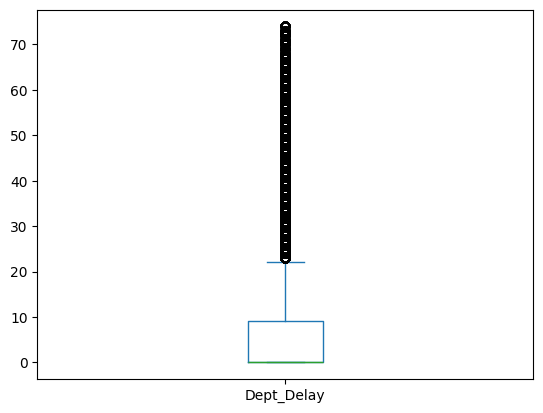

In [39]:
df[df["Dept_Delay"]<= df["Dept_Delay"].quantile(0.95)]["Dept_Delay"].plot.box()

In [40]:
df[df["Dept_Delay"]<= df["Dept_Delay"].quantile(0.9)]["Dept_Delay"].shape

(114220,)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       126896 non-null  object
 1   Gender                             126896 non-null  object
 2   Customer Type                      126896 non-null  object
 3   Age                                126896 non-null  int64 
 4   Type of Travel                     126896 non-null  object
 5   Class                              126896 non-null  object
 6   Flight Distance                    126896 non-null  int64 
 7   Seat comfort                       126896 non-null  int64 
 8   Departure/Arrival time convenient  126896 non-null  int64 
 9   Food and drink                     126896 non-null  int64 
 10  Gate location                      126896 non-null  int64 
 11  Inflight wifi service              126896 non-null  int64

<Axes: >

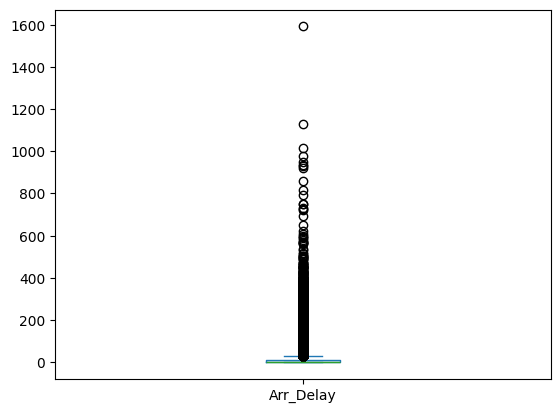

In [42]:
df["Arr_Delay"].plot.box()

<Axes: >

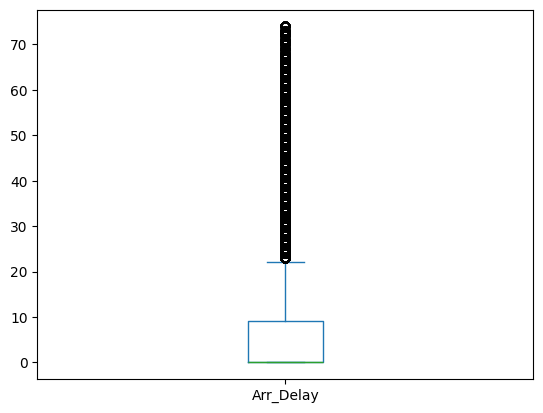

In [43]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].plot.box()

In [44]:
df[df["Arr_Delay"]<= df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].shape

(120591,)

In [45]:
df = df[df["Arr_Delay"]<= df["Arr_Delay"].quantile(0.95)]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120591 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       120591 non-null  object
 1   Gender                             120591 non-null  object
 2   Customer Type                      120591 non-null  object
 3   Age                                120591 non-null  int64 
 4   Type of Travel                     120591 non-null  object
 5   Class                              120591 non-null  object
 6   Flight Distance                    120591 non-null  int64 
 7   Seat comfort                       120591 non-null  int64 
 8   Departure/Arrival time convenient  120591 non-null  int64 
 9   Food and drink                     120591 non-null  int64 
 10  Gate location                      120591 non-null  int64 
 11  Inflight wifi service              120591 non-null  int64

# Plot Graph
* Countplot is used to create bar charts which will shows the count of observations.
* Used to check the relation between two columns.
* Output : The graph shows the how many customers satisfied or dissatisfied with seat comfort facility.

<Axes: xlabel='Seat comfort', ylabel='count'>

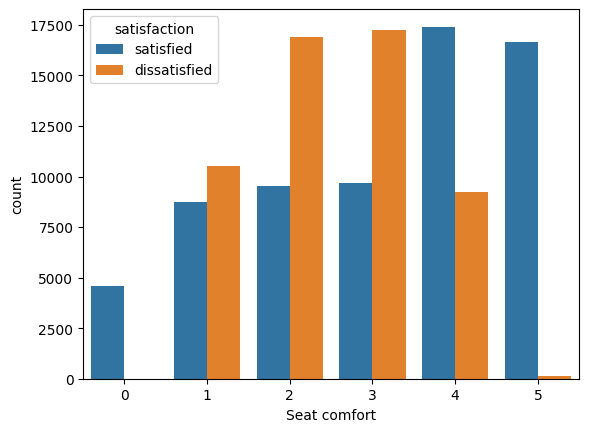

In [47]:
sns.countplot(x=df["Seat comfort"], hue = df["satisfaction"])

<Axes: xlabel='Departure/Arrival time convenient', ylabel='count'>

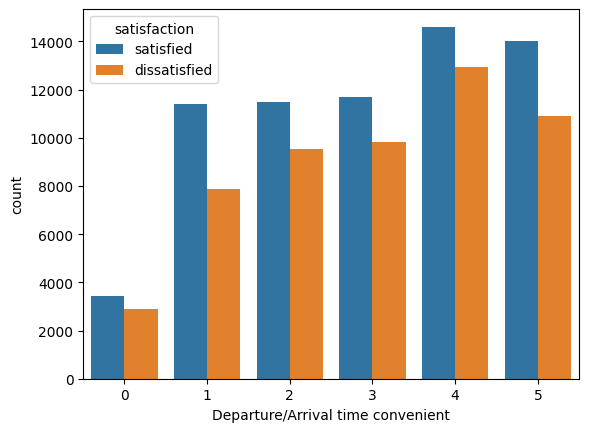

In [48]:
sns.countplot(x=df["Departure/Arrival time convenient"], hue = df["satisfaction"])

<Axes: xlabel='Food and drink', ylabel='count'>

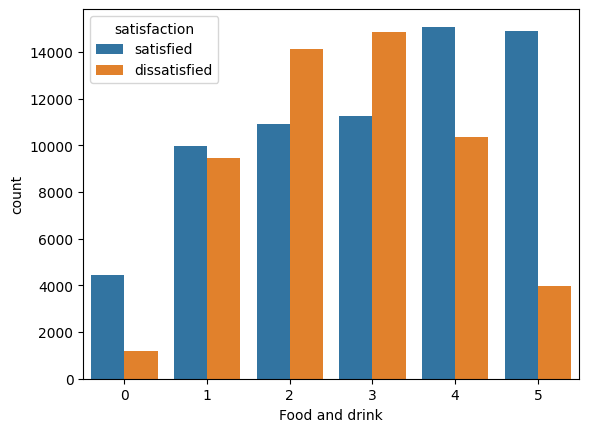

In [49]:
sns.countplot(x=df["Food and drink"], hue = df["satisfaction"])

<Axes: xlabel='Gate location', ylabel='count'>

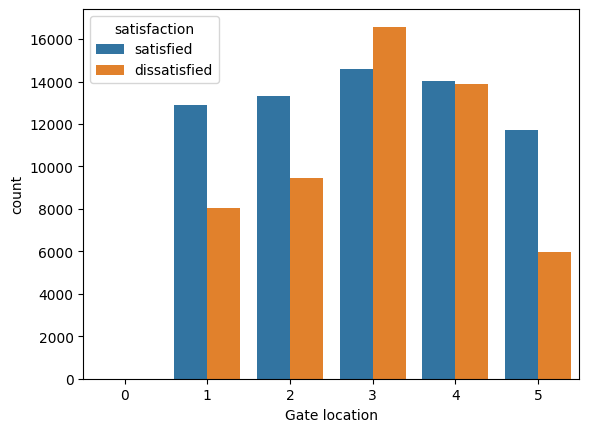

In [50]:
sns.countplot(x=df["Gate location"], hue = df["satisfaction"])

* In following DataFrame there is Inflight Wifi Services provided .
* How many of customers are satisfied or dissatisfied with wifi services.

<Axes: xlabel='Inflight wifi service', ylabel='count'>

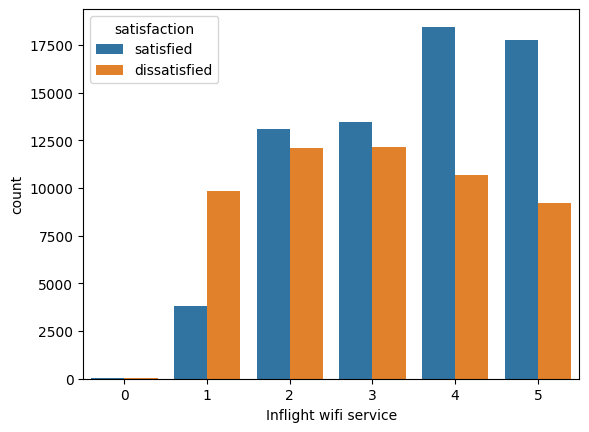

In [51]:
sns.countplot(x=df["Inflight wifi service"], hue = df["satisfaction"])

<Axes: xlabel='Inflight entertainment', ylabel='count'>

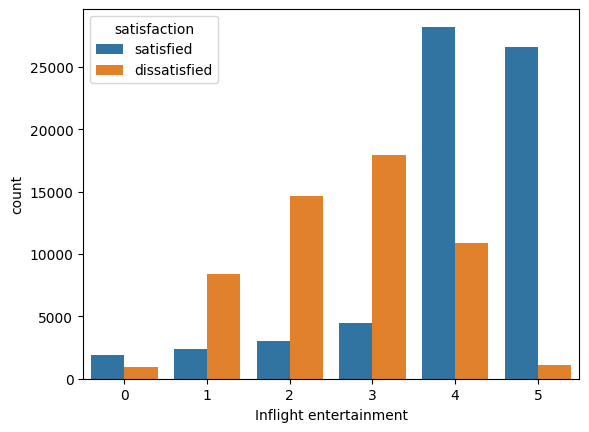

In [52]:
sns.countplot(x=df["Inflight entertainment"], hue = df["satisfaction"])

<Axes: xlabel='Online support', ylabel='count'>

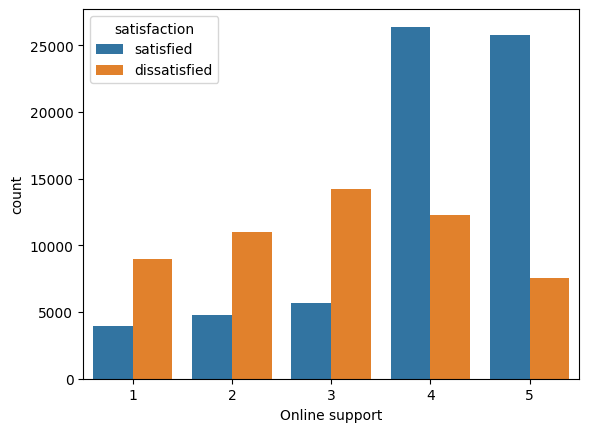

In [53]:
sns.countplot(x=df["Online support"], hue = df["satisfaction"])

<Axes: xlabel='Ease of Online booking', ylabel='count'>

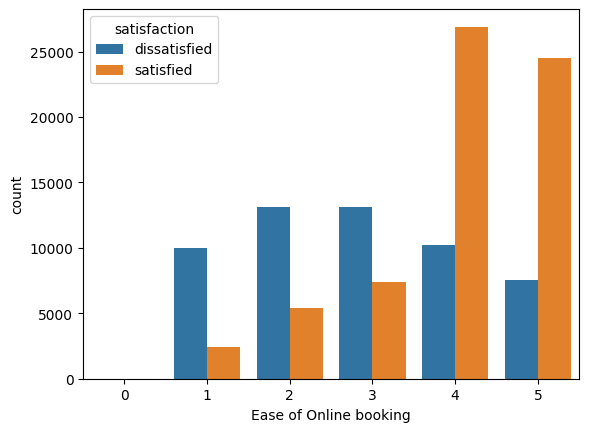

In [54]:
sns.countplot(x=df["Ease of Online booking"], hue = df["satisfaction"])

<Axes: xlabel='On-board service', ylabel='count'>

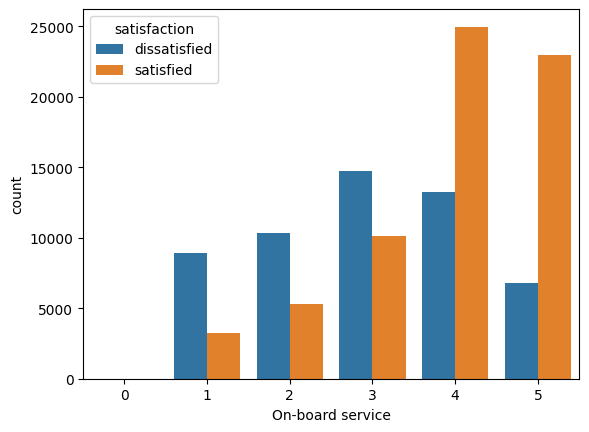

In [55]:
sns.countplot(x=df["On-board service"], hue = df["satisfaction"])

<Axes: xlabel='Leg room service', ylabel='count'>

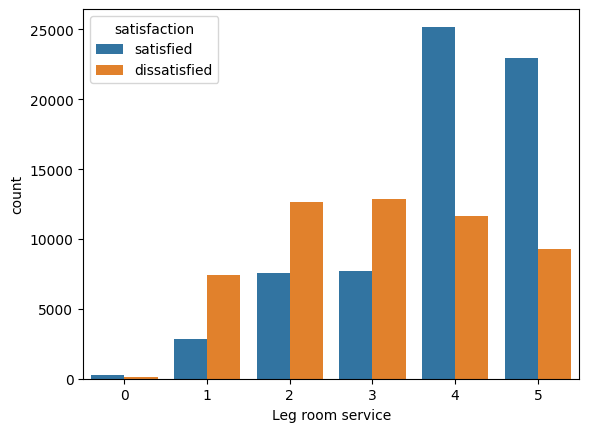

In [56]:
sns.countplot(x=df["Leg room service"], hue = df["satisfaction"])

<Axes: xlabel='Baggage handling', ylabel='count'>

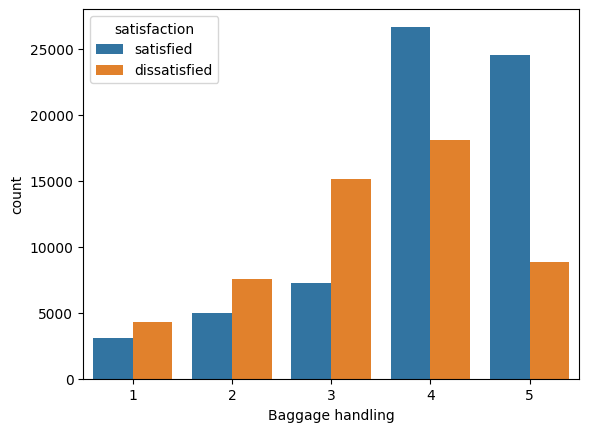

In [57]:
sns.countplot(x=df["Baggage handling"], hue = df["satisfaction"])

<Axes: xlabel='Checkin service', ylabel='count'>

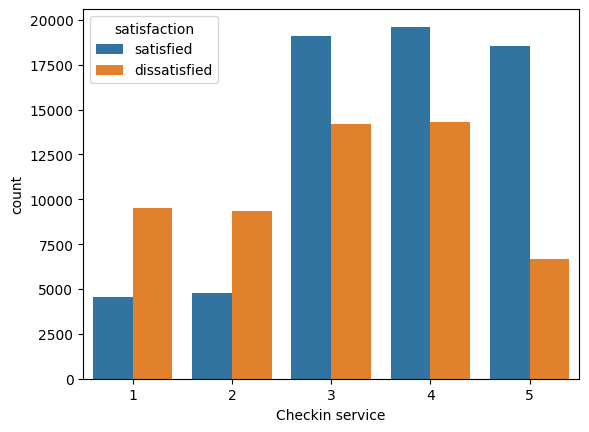

In [58]:
sns.countplot(x=df["Checkin service"], hue = df["satisfaction"])

<Axes: xlabel='Cleanliness', ylabel='count'>

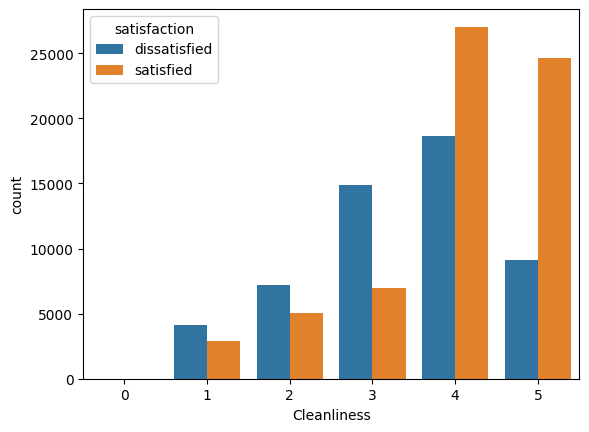

In [59]:
sns.countplot(x=df["Cleanliness"], hue = df["satisfaction"])

<Axes: xlabel='Online boarding', ylabel='count'>

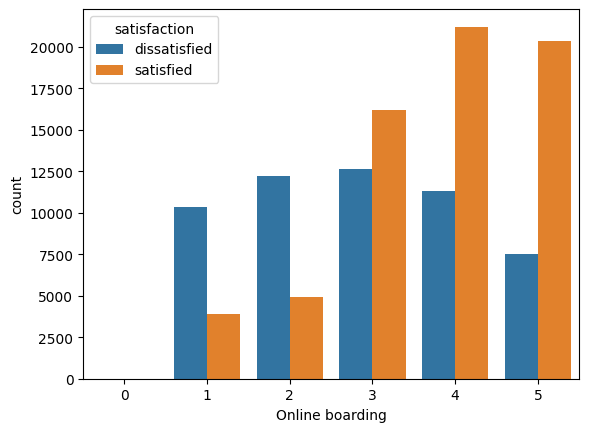

In [60]:
sns.countplot(x=df["Online boarding"], hue = df["satisfaction"])

* Checking the null value of columns in data.

In [61]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

* In DataFrame create a new column and name that column "Male", df contains binary values reprents the gender information from the gender column, The male column will have:- 1) A value of 1 if the gender is "Male" and 2) A value of 0 if the gender is "Female".
* Convert categorical column "Gender" into a numeric format.

In [62]:
df["Male"] = pd.get_dummies(df["Gender"],dtype ="int", drop_first = True)

* Drop that gender column.

In [63]:
df.drop("Gender", axis=1 ,inplace=True)

* To check the unique values in Customer Type Column.

In [64]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

* Map applies the lambda function to each element in the "Customer Type" Column.
* The lambda function checks the first letter of each value (X) in the "Customer Type" Column.
* If the first letter of 'x' is "L" , it returns 1 , indicating customer is "Loyal"
* Otherwise, returns 0, indicating customer is "Not Loyal".

In [65]:
df["Loyal_customer"]= list(map(lambda x:1 if x[0]=="L" else 0, df["Customer Type"]))

* Check the column after applying lambda function.

In [66]:
df[["Customer Type","Loyal_customer"]]

,Customer Type,Loyal_customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129871,disloyal Customer,0
129872,disloyal Customer,0
129873,disloyal Customer,0
129874,disloyal Customer,0


* Drop the Customer Type Column.

In [67]:
df.drop("Customer Type", axis=1, inplace =True)

* unique() is used to find and display the unique values in the "Type of Travel" column.
* This method returns an array of the unique values present in the "Type of Travel" column.

In [68]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

* The lambda function checks the first letter of each value(x) in the "Type of Travel" column.
* If the first letter of 'x' is "P" it returns 1 , if it is "Personal Travel".
* Otherwise, it returns 0, if it is "Business Travel".

In [69]:
df["Type of Travel"] = list(map(lambda x: 1 if x[0]=="P" else 0, df["Type of Travel"]))

In [70]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_customer
0,satisfied,65,1,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0,0,1
2,satisfied,15,1,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0,0,1
3,satisfied,60,1,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0,0,1
4,satisfied,70,1,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0,0,1
5,satisfied,30,1,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0,1,1


# Build Model

# Using Label Encoder

# Import Library 

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [73]:
le.fit_transform(df["Class"])

array([1, 1, 1, ..., 1, 1, 1])

* le.fit_transform used to encode categorical labels in the "Class" column of DataFrame 'df' into numeric form.

In [ ]:
df["Class"]=le.fit_transform(df["Class"])

In [75]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0,1,1


In [76]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_customer                       0
dtype: int64

# Train Train Split

In [77]:
from sklearn.model_selection import train_test_split

* Used to prepare the features and target variable.
* Split data into X and y form.

In [78]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [79]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size = 0.75,random_state =98)

# Logistic Regression 

In [80]:
from sklearn.linear_model import LogisticRegression

* Build model by using Logistic Regression.

In [81]:
model = LogisticRegression()

* Model fit into X_train and y_train format.

In [82]:
model.fit(X_train,y_train)

LogisticRegression()

* Predict the model.

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

* Check the accuracy score of y_test and y_pred.
* It is used to evaluate the Performance of a classification model by measuring the model is correctly predicts the target variale.

In [85]:
accuracy_score(y_test,y_pred)

0.780317102295343

* Confusion matrix is used describe performance of a classification model on the set of test data for which the true values are known.

In [86]:
confusion_matrix(y_test,y_pred)

array([[ 9323,  4176],
       [ 2447, 14202]], dtype=int64)

* To check the classification report of the DataFrame.

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

dissatisfied       0.79      0.69      0.74     13499
   satisfied       0.77      0.85      0.81     16649

    accuracy                           0.78     30148
   macro avg       0.78      0.77      0.77     30148
weighted avg       0.78      0.78      0.78     30148



* To check the model score.

In [88]:
model.score(X_train,y_train)

0.7853012394546842

# Result
* We use LogisticRegression for our Model.
* Accuarcy Score of Logistic Regression is 78% and score is 78%.